### Project Title: Telecommunication Customer Churn Prediction

### Introduction: 
Customer churn, also knows as customer turnover or customer defection. The situation refers to loss of customers. Churn is expensive and it cost more to acquiring a new customer than it does to retain a current one. For this very reason, there is the motivation to predict it before it happens.

A giant Telecommunication company in Senegal wants to predict which customers are at high risk of leaving the company or canceling a subscription to a service, based on their behavior towards key products of the company.

In this project, Machine Learning Models will be used to predict the future churn rate for the company. This will help to focus attention on customer retention programs to avert or minimize future churn

### Hypothesis

1. Customers with longer tenure are less likely to churn than those with short tenure.

2. Customers with lesser income are likely to churn than those who have higher

3. Customers are more likely to switch to a network that offer better call plan to call other networks.

4. Customers who patronize a particular plan or service are most likely to churn. 

### Business Questions:
Here are seven potential business questions that can be answered using the telecom churn data:

1. What is the overall churn rate for the telecom company during the observed period?

This question aims to provide an understanding of the churn rate as a baseline for further analysis and decision-making.

2. Are there any specific regions or geographic areas with a higher churn rate compared to others?

By analyzing churn rates across different regions, the telecom company can identify areas that require targeted retention strategies or improved service quality.

3. Do customers who have been with the network for a longer tenure exhibit lower churn rates?

This question explores the relationship between customer tenure and churn rate, helping the company understand the impact of customer loyalty on churn.

4. Is there a correlation between top-up amount (MONTANT) and churn rate?

This question investigates whether customers with higher or lower top-up amounts are more likely to churn, providing insights into the relationship between spending behavior and churn.

5. Are customers who frequently activate specific top pack packages (TOP_PACK) less likely to churn?

This question examines the influence of top pack usage on churn rate, helping the company identify which packs contribute to customer retention and can be promoted further.

6. Are customers who have a higher number of on-net calls (ON_NET) less likely to churn?

This question seeks help to help the company to assess how ON_NET or inter expresso calls contribute to the churn rate of the company.

7. Do customers who regularly refill their accounts (FREQUENCE_RECH) have lower churn rates compared to those who refill less frequently?

- These questions can provide valuable insights into churn patterns, customer behavior, and factors contributing to customer retention. Analyzing the telecom churn data in relation to these questions can help the company make informed decisions and develop effective strategies to reduce churn, improve customer satisfaction, and enhance business performance.

### Import Libraries

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

## Load Data

In [2]:
train = pd.read_csv(r"C:\Users\Nathaniel Havim\Desktop\Capstone_project\Data\Train.csv")
test = pd.read_csv(r"C:\Users\Nathaniel Havim\Desktop\Capstone_project\Data\Test.csv")

df = train

## Exploratory Data Analysis: EDA
Here is the section to inspect the datasets in depth, present it, make hypotheses and think the cleaning, processing and features creation

In [3]:
print(df.head())

                                    user_id       REGION        TENURE  \
0  7ee9e11e342e27c70455960acc80d3f91c1286d1        DAKAR  K > 24 month   
1  50443f42bdc92b10388fc56e520e4421a5fa655c          NaN  K > 24 month   
2  da90b5c1a9b204c186079f89969aa01cb03c91b2          NaN  K > 24 month   
3  364ec1b424cdc64c25441a444a16930289a0051e  SAINT-LOUIS  K > 24 month   
4  d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb        DAKAR  K > 24 month   

   MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
0  20000.0            47.0  21602.0        7201.0       52.0       8835.0   
1      NaN             NaN      NaN           NaN        NaN          NaN   
2      NaN             NaN      NaN           NaN        NaN          NaN   
3   7900.0            19.0   7896.0        2632.0       25.0       9385.0   
4  12350.0            21.0  12351.0        4117.0       29.0       9360.0   

   ON_NET  ORANGE   TIGO  ZONE1  ZONE2 MRG  REGULARITY  \
0  3391.0   396.0  185.0    NaN   

In [4]:
# Check dataset dimension 
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1077024
Number of columns: 19


In [5]:
# print data types
print(df.dtypes)

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object


In [6]:
# Drop the User_id column
df.drop('user_id', axis=1, inplace=True)

In [7]:
df['TENURE'].value_counts()

K > 24 month     1021853
I 18-21 month      22494
H 15-18 month      12913
G 12-15 month       7520
J 21-24 month       6324
F 9-12 month        4604
E 6-9 month          929
D 3-6 month          387
Name: TENURE, dtype: int64

In [8]:
df['REGULARITY'].value_counts()

1     97779
62    83524
2     59172
3     43102
4     34241
      ...  
34     9731
37     9666
33     9653
35     9649
36     9573
Name: REGULARITY, Length: 62, dtype: int64

### Perform descriptive statistics on the dataset

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,699139.0,5529.210895,7104.737952,20.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,699139.0,11.523756,13.261938,1.0,2.0,7.0,16.0,131.0
REVENUE,714669.0,5506.050798,7175.625010,1.0,1000.0,3000.0,7360.0,532177.0
ARPU_SEGMENT,714669.0,1835.355961,2391.870902,0.0,333.0,1000.0,2453.0,177392.0
FREQUENCE,714669.0,13.974439,14.687059,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,547261.0,3368.801722,12898.928039,0.0,0.0,258.0,2905.0,1702309.0
ON_NET,683850.0,277.065798,874.315378,0.0,5.0,27.0,156.0,50809.0
ORANGE,629880.0,95.160804,203.020261,0.0,7.0,29.0,99.0,12040.0
TIGO,432250.0,23.105018,64.035464,0.0,2.0,6.0,20.0,4174.0
ZONE1,84898.0,8.167483,39.245883,0.0,0.0,1.0,3.0,2507.0


## Definition of Variables

**REGION**: The location of each client

**TENURE**: Duration with the network

**MONTANT**: Top-Up Amount

**FREQUENCE_RECH**: the number of times a customer refilled

**REVENUE**: Monthly income of each client

**ARPU_SEGMENT**: income over 90 days / 3

**FREQUENCE**: number of times the client has made an income.

**DATA_VOLUME**: number of connections

**ON_NET**: inter expresso call

**ORANGE**: calls to orange

**TIGO**: calls to tigo

**ZONE1**: calls to zone1

**ZONE2**: calls to zone2

**MRG**: a client who is going

**REGULARITY**: number of times the client is active for 90 days

**TOP_PACK**: the most active packs

**FREQ_TOP_PACK**: number of times the client has activated the top pack packages

**CHURN**: variable to predict - Target

In [10]:
# unique elements of MONTANT column
df.MONTANT.unique()

array([20000.,    nan,  7900., ..., 35475.,  6216.,  8949.])

In [11]:
# unique elements of REVENUE column
df.REVENUE.unique()

array([21602.,    nan,  7896., ..., 37609., 21676., 26489.])

In [12]:
# unique elements in TOP_PACK column
df.TOP_PACK.unique()

array(['On net 200F=Unlimited _call24H', nan, 'Data:490F=1GB,7d',
       'All-net 500F=2000F;5d', 'On-net 500=4000,10d',
       'Data:3000F=10GB,30d', 'Data:200F=Unlimited,24H',
       'IVR Echat_Daily_50F', 'Data:1000F=2GB,30d',
       'Mixt 250F=Unlimited_call24H', 'On-net 1000F=10MilF;10d',
       'MIXT:500F= 2500F on net _2500F off net;2d',
       'Data: 200 F=100MB,24H', 'All-net 600F= 3000F ;5d',
       'On-net 200F=60mn;1d', 'Twter_U2opia_Daily',
       'Data: 100 F=40MB,24H', 'All-net 500F =2000F_AllNet_Unlimited',
       'On net 200F= 3000F_10Mo ;24H', '200=Unlimited1Day', 'Jokko_Daily',
       'Data:1000F=5GB,7d', 'Data:700F=1.5GB,7d', 'All-net 1000=5000;5d',
       'Data:150F=SPPackage1,24H', 'IVR Echat_Monthly_500F',
       'VAS(IVR_Radio_Daily)', 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
       'MIXT: 200mnoff net _unl on net _5Go;30d', 'On-net 500F_FNF;3d',
       'MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t',
       'Data:1500F=3GB,30D', 'Data:300F=100MB,2d', 'Data:500F

### Univariate Analysis
This sction visualizes each individual feature in the dataset.

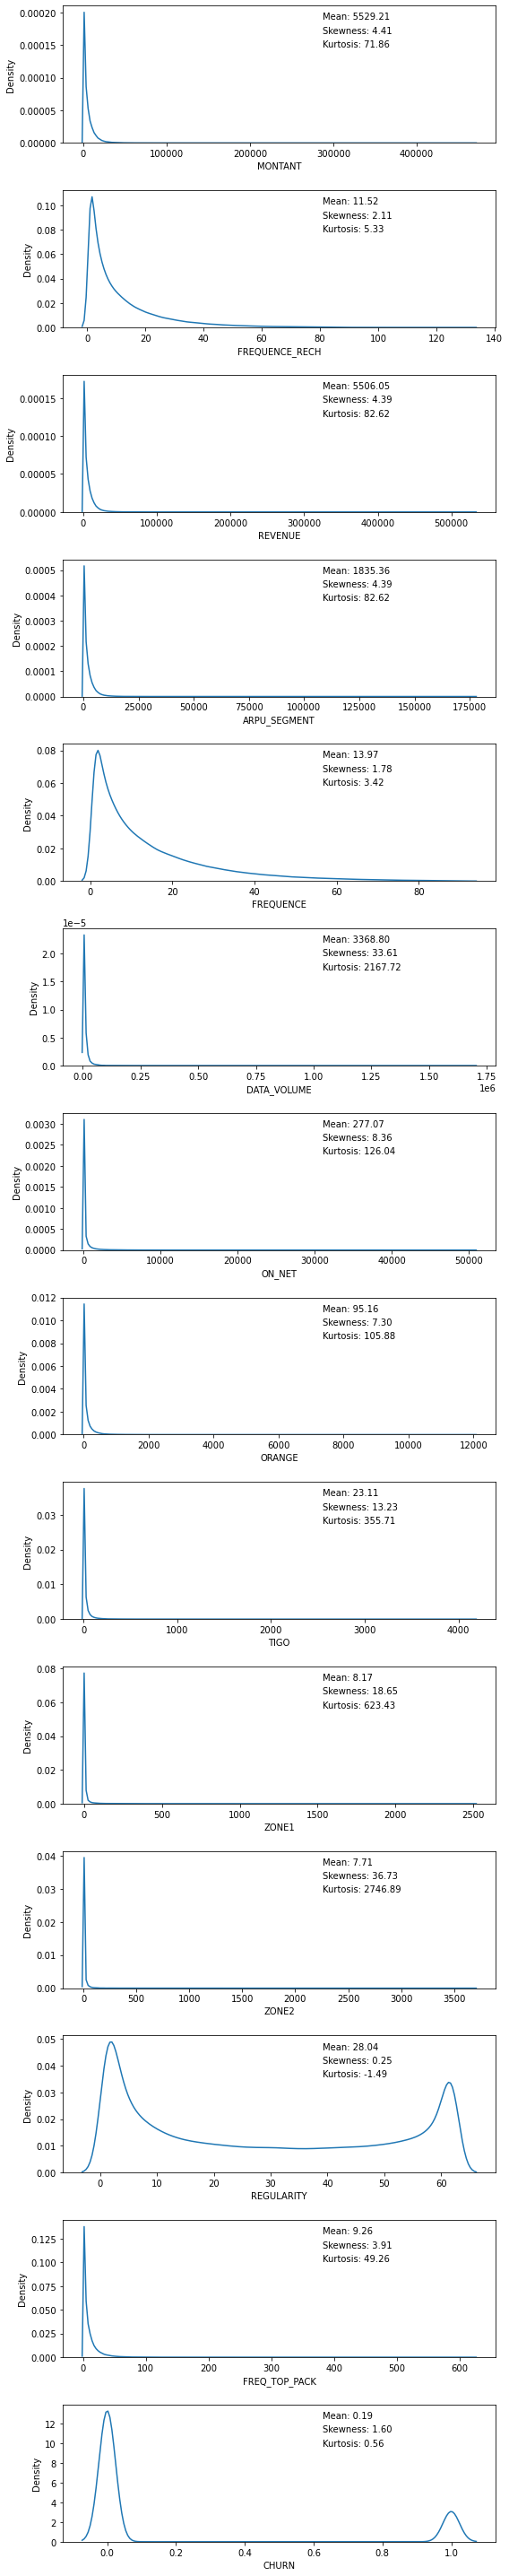

In [13]:
# Extracting all numerical variables 
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 40))
for i, col in enumerate(num_cols):
    sns.kdeplot(data=df, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
    # Calculate mean, skewness, and kurtosis
    mean_val = df[col].mean()
    skewness_val = df[col].skew()
    kurtosis_val = df[col].kurtosis()
    
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
    
plt.tight_layout()
plt.show()

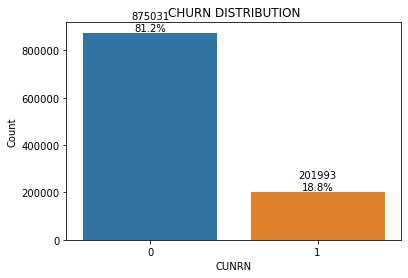

In [14]:
# Count plot for "CHURN"
sns.countplot(data=df, x='CHURN')

# Set labels
plt.xlabel('CUNRN')
plt.ylabel('Count')

# Set title
plt.title('CHURN DISTRIBUTION')

# Calculate percentage distribution
total = len(df['CHURN'])
percentages = df['CHURN'].value_counts(normalize=True) * 100

# Add data labels and percentage annotations
for p, percentage in zip(plt.gca().patches, percentages):
    count = p.get_height()
    percentage_label = f'{percentage:.1f}%'
    plt.gca().annotate(f'{count}\n{percentage_label}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')


plt.show()


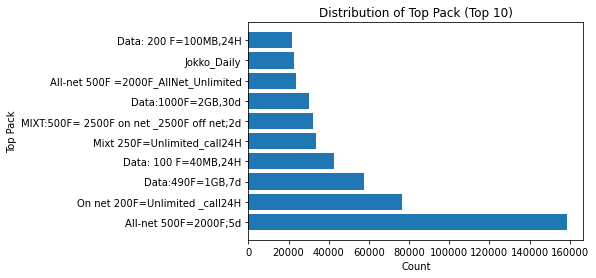

In [15]:
# Barplot to show the distribution of the TOP_PACK
top_pack_counts = df['TOP_PACK'].value_counts().head(10)
plt.barh(top_pack_counts.index, top_pack_counts.values)
plt.xlabel('Count')
plt.ylabel('Top Pack')
plt.title('Distribution of Top Pack (Top 10)')
plt.show()

### Bivariate Analysis

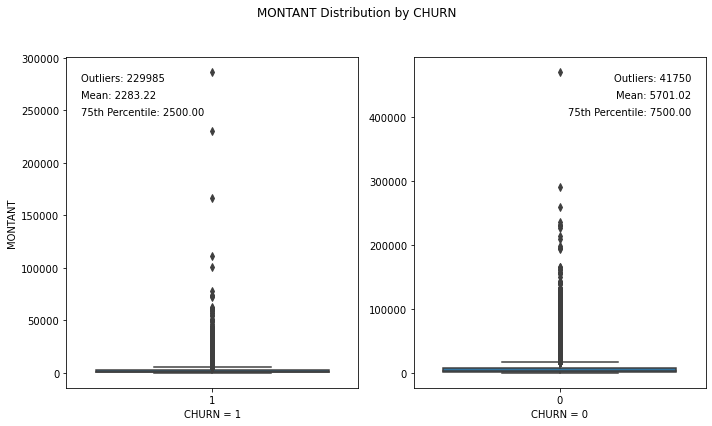

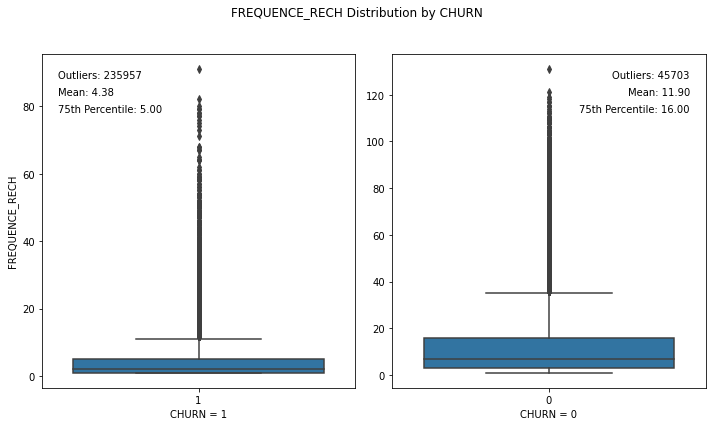

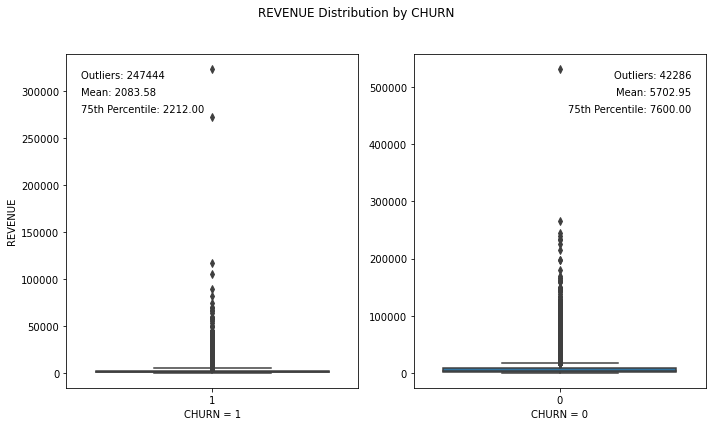

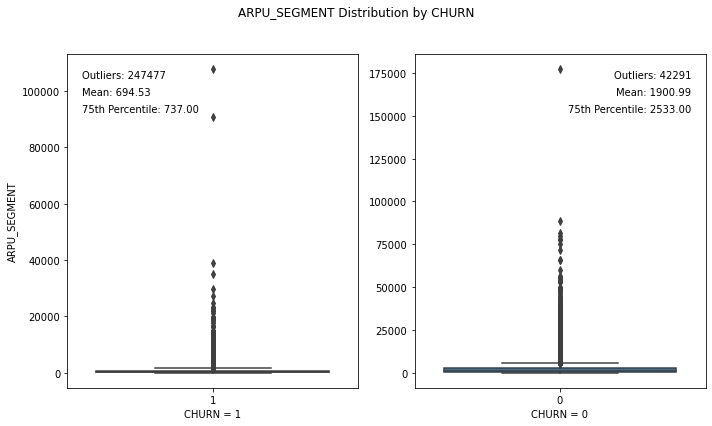

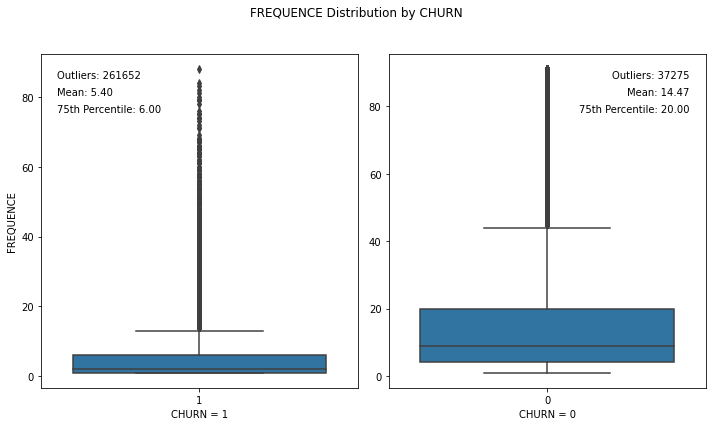

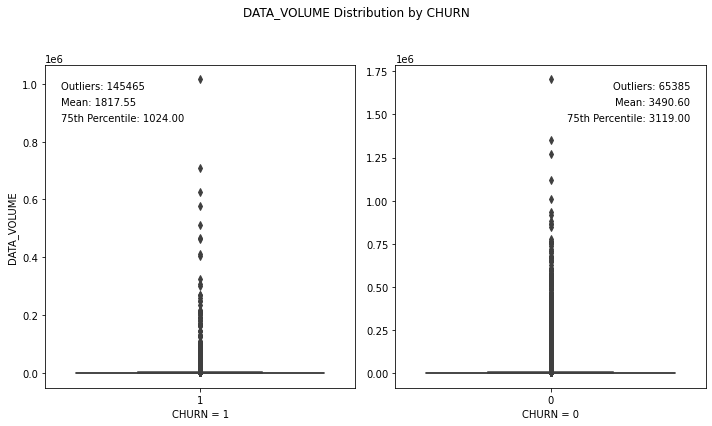

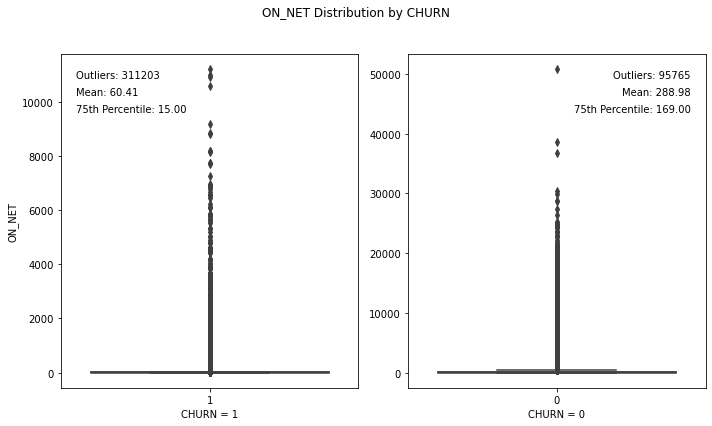

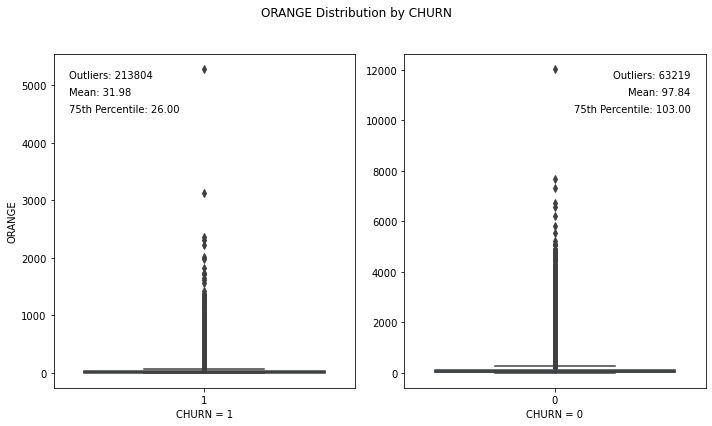

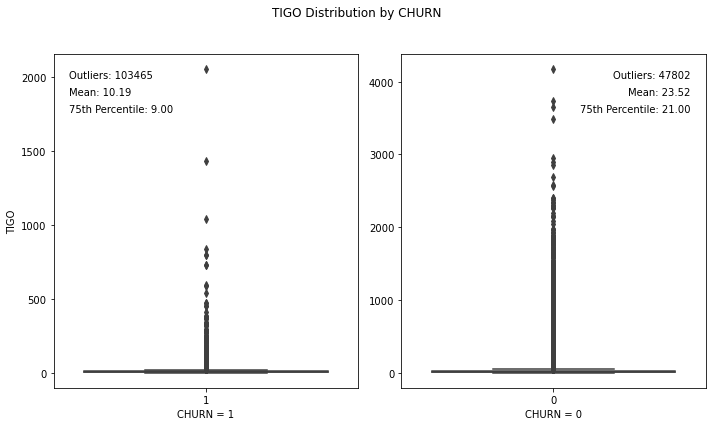

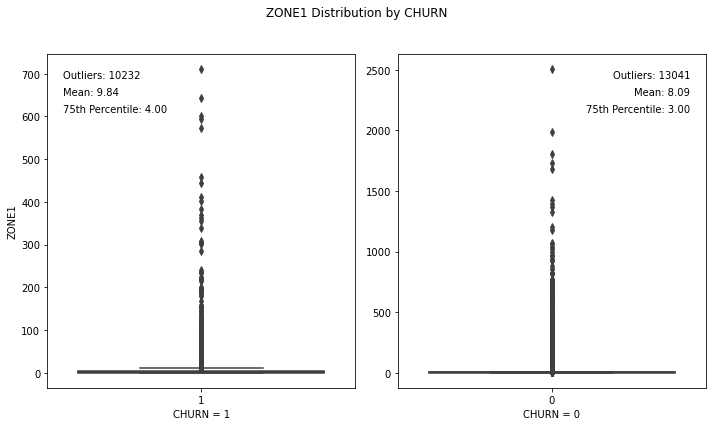

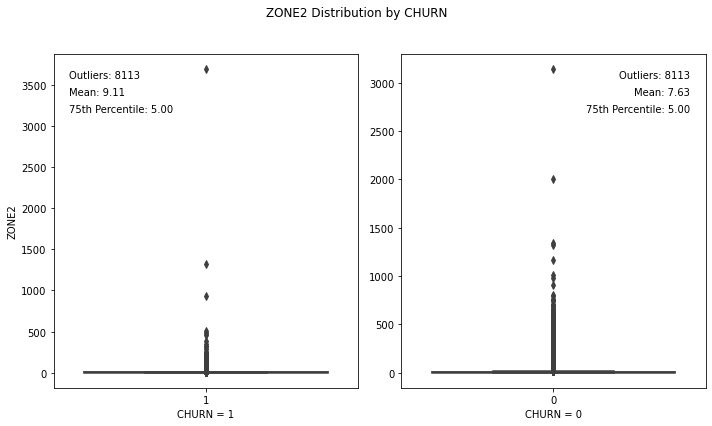

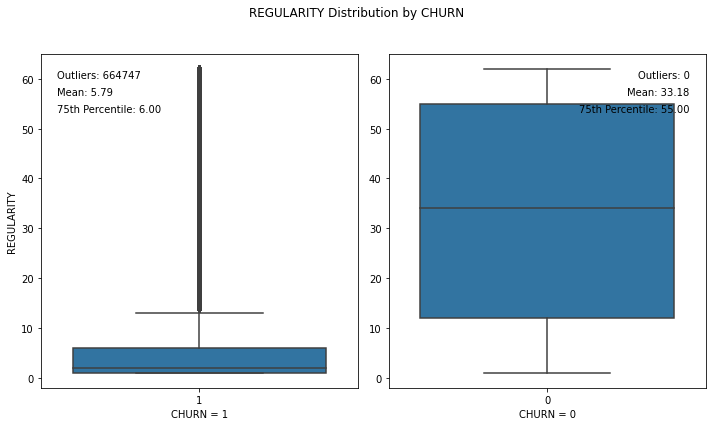

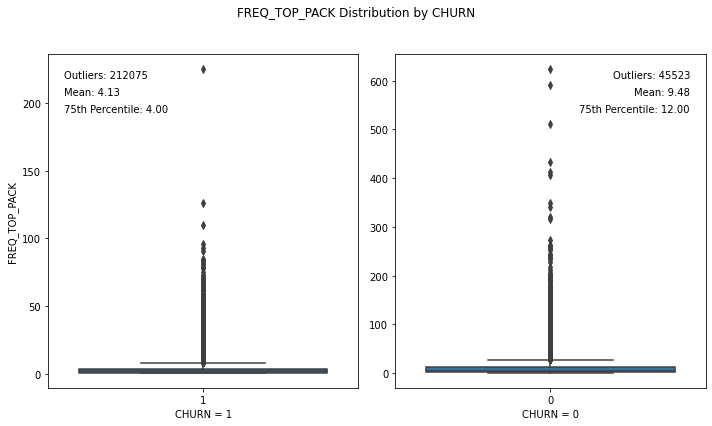

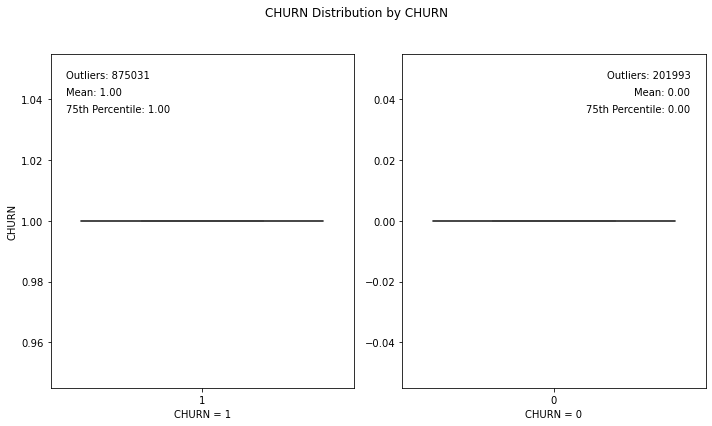

In [16]:
# Extracting all numerical variables
for col in num_cols:
    plt.figure(figsize=(10, 6))
    
    # Plot boxplot for churn = 1
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df[df['CHURN'] == 1], x='CHURN', y=col)
    q75_1 = df[df['CHURN'] == 1][col].quantile(0.75)
    q25_1 = df[df['CHURN'] == 1][col].quantile(0.25)
    iqr_1 = q75_1 - q25_1
    outliers_1 = df[(df[col] < q25_1 - 1.5 * iqr_1) | (df[col] > q75_1 + 1.5 * iqr_1)][col]
    num_outliers_1 = len(outliers_1)
    plt.text(0.05, 0.95, f"Outliers: {num_outliers_1}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.90, f"Mean: {df[df['CHURN'] == 1][col].mean():.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.text(0.05, 0.85, f"75th Percentile: {q75_1:.2f}", ha='left', va='top', transform=plt.gca().transAxes)
    plt.xlabel('CHURN = 1')
    plt.ylabel(col)
    
    # Plot boxplot for churn = 0
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df[df['CHURN'] == 0], x='CHURN', y=col)
    q75_0 = df[df['CHURN'] == 0][col].quantile(0.75)
    q25_0 = df[df['CHURN'] == 0][col].quantile(0.25)
    iqr_0 = q75_0 - q25_0
    outliers_0 = df[(df[col] < q25_0 - 1.5 * iqr_0) | (df[col] > q75_0 + 1.5 * iqr_0)][col]
    num_outliers_0 = len(outliers_0)
    plt.text(0.95, 0.95, f"Outliers: {num_outliers_0}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.90, f"Mean: {df[df['CHURN'] == 0][col].mean():.2f}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.text(0.95, 0.85, f"75th Percentile: {q75_0:.2f}", ha='right', va='top', transform=plt.gca().transAxes)
    plt.xlabel('CHURN = 0')
    plt.ylabel('')
    
    plt.suptitle(f'{col} Distribution by CHURN')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


### Multivariate Analysis

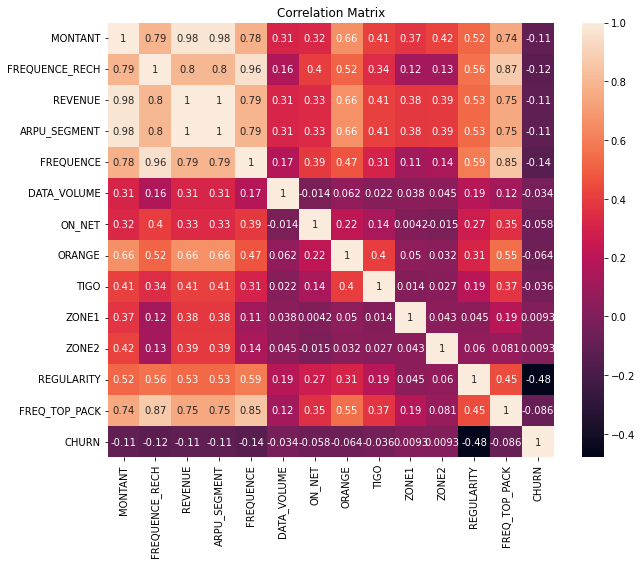

In [17]:
# Calculate correlation matrix
correl =df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correl, annot=True)
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:title={'center':'Distribution by TENURE, RELIGION,MRG and TOP_PACK'}, ylabel='None'>

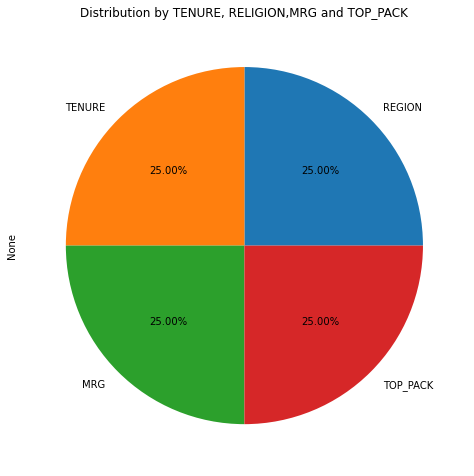

In [18]:
cat_features = df.select_dtypes(include='object').columns

to_plot= cat_features.value_counts() * 100
to_plot.plot(kind='pie', figsize=(8,10),autopct='%1.2f%%',title='Distribution by TENURE, RELIGION,MRG and TOP_PACK')

### HYPOTHESIS TESTING

##### Hypothesis 1: 

Null Hypothesis (H0): There is no significant relationship between customer tenure and churn rate. Customers with longer tenure are equally likely to churn as those with short tenure.

Alternative Hypothesis (H1): Customers with longer tenure are less likely to churn than those with short tenure. There is a significant negative relationship between customer tenure and churn rate.

use a hypothesis testing technique to analyze the relationship between customer tenure and churn rate. One commonly used hypothesis test in this scenario is the chi-square test of independence.

Here's how you can apply the chi-square test of independence to test your hypothesis:

Set up your hypothesis:

Null Hypothesis (H0): There is no significant relationship between customer tenure and churn rate. Customers with longer tenure are equally likely to churn as those with short tenure.
Alternative Hypothesis (H1): Customers with longer tenure are less likely to churn than those with short tenure. There is a significant negative relationship between customer tenure and churn rate.
Create a contingency table: Construct a contingency table that cross-tabulates the categories of customer tenure (e.g., short tenure vs. long tenure) with the categories of churn (e.g., churned vs. not churned). This table will show the counts or frequencies of observations in each combination of categories.

Calculate the expected frequencies: Calculate the expected frequencies under the assumption that there is no relationship between customer tenure and churn rate. This can be done using the row and column totals of the contingency table.

Compute the chi-square statistic: Calculate the chi-square statistic using the observed and expected frequencies from the contingency table. The formula for the chi-square statistic involves comparing the observed and expected frequencies for each cell in the table.

Determine the p-value: Once you have the chi-square statistic, you can determine the p-value associated with it. The p-value represents the probability of observing a relationship as extreme as or more extreme than the one observed, assuming the null hypothesis is true.

Make a decision: Compare the p-value to a predetermined significance level (e.g., 0.05). If the p-value is less than the significance level, you reject the null hypothesis in favor of the alternative hypothesis. This would suggest that there is a significant relationship between customer tenure and churn rate.

Using the chi-square test of independence allows you to assess whether there is a significant association between customer tenure and churn rate, supporting or rejecting your hypotheses.

The chi-square test of independence is a suitable choice because it allows you to analyze the relationship between two categorical variables and assess if there is evidence to support the alternative hypothesis.

In [19]:
# Create a contingency table
contingency_table = pd.crosstab(df['TENURE'], df['CHURN'])

# Perform chi-square test of independence
chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)

# Print the chi-square statistic and p-value
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)


Chi-square statistic: 2898.5207691813353
p-value: 0.0


Based on the results you obtained, the chi-square test of independence between customer tenure and churn rate yielded a chi-square statistic of 2898.5207691813353 and a p-value of 0.0.

The p-value represents the probability of obtaining the observed data (or more extreme) if the null hypothesis is true. In this case, the p-value is extremely low (close to zero), indicating strong evidence against the null hypothesis.

Therefore, you can reject the null hypothesis and conclude that there is a significant relationship between customer tenure and churn rate. Customers with longer tenure are less likely to churn than those with short tenure. This supports the alternative hypothesis.

##### Hypothesis 2: 

Customers with lesser income are likely to churn than those who have higher

Null Hypothesis (H0): There is no significant relationship between customer income and churn rate. Customers with lesser income are equally likely to churn as those with higher income.

Alternative Hypothesis (H1): Customers with lesser income are likely to churn than those with higher income. There is a significant negative relationship between customer income and churn rate.

To test the hypothesis that customers with lesser income are likely to churn than those with higher income, you can use a hypothesis testing technique called the two-sample t-test.

The two-sample t-test is suitable for comparing the means of two independent groups when the dependent variable (in this case, churn rate) is continuous and the independent variable (income) is categorical with two levels.

Here's how you can perform the two-sample t-test to test your hypothesis:

Set up your hypothesis:

Null Hypothesis (H0): There is no significant relationship between customer income and churn rate. Customers with lesser income are equally likely to churn as those with higher income.
Alternative Hypothesis (H1): Customers with lesser income are likely to churn than those with higher income. There is a significant negative relationship between customer income and churn rate.
Split the data into two groups: Divide your dataset into two groups based on the income levels (e.g., lesser income group and higher income group).

Perform the two-sample t-test: Apply the two-sample t-test to compare the churn rates between the two groups. This test will determine if there is a statistically significant difference in churn rates based on income.

Calculate the p-value: The two-sample t-test will provide a p-value, which represents the probability of observing a difference in churn rates as extreme as or more extreme than the one observed, assuming the null hypothesis is true.

Make a decision: Compare the p-value to your chosen significance level (e.g., 0.05). If the p-value is less than the significance level, you can reject the null hypothesis in favor of the alternative hypothesis, indicating a significant relationship between customer income and churn rate.

The choice of the two-sample t-test is justified because it allows you to compare the means (or in this case, the churn rates) of two independent groups (based on income) and determine if there is a significant difference between them. As income is a continuous variable and churn rate is likely to be a numeric variable, the two-sample t-test is appropriate for analyzing the relationship between these variables.

Please note that before performing the two-sample t-test, you may need to preprocess the churn rate variable to ensure it is appropriate for the test (e.g., transform it to a binary variable indicating churned or not churned based on a threshold).

In this updated code, the skewness of the 'INCOME' column is calculated using the skew function from Pandas. If the skewness is less than 0.5, we assume the distribution is approximately symmetric and use the mean as the threshold. If the skewness is greater than or equal to 0.5, we assume the distribution is skewed and use the median as the threshold.

The data is then split into two groups based on the adjusted income levels: 'lesser_income' for values less than or equal to the threshold, and 'higher_income' for values greater than the threshold.

Finally, the two-sample t-test is performed on the 'REVENUE' values of the two income groups, and the t-statistic and p-value are printed.

In [20]:
# Assuming you have your data in a DataFrame named 'data'
# with 'CHURN' column indicating churn status and 'REVENUE' column for income

# Check the skewness of the revenue data
skewness = df['REVENUE'].skew()

# Set the threshold based on skewness
if abs(skewness) > 1:
    threshold = df['REVENUE'].median()
else:
    threshold = df['REVENUE'].mean()

# Split the data into two groups based on income
lower_income = df[df['REVENUE'] <= threshold]
higher_income = df[df['REVENUE'] > threshold]

# Perform two-sample t-test
t_stat, p_val = stats.ttest_ind(lower_income['CHURN'], higher_income['CHURN'])

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: 127.27523691554823
p-value: 0.0


The result of the hypothesis test indicates that there is a significant relationship between customer income and churn rate.

The t-statistic value of 127.275 suggests a large difference between the means of the two income groups. The positive value of the t-statistic suggests that customers with higher income are less likely to churn compared to those with lower income.

The p-value of 0.0 indicates that the observed difference in churn rates between the income groups is statistically significant. With a p-value less than the conventional significance level of 0.05, we reject the null hypothesis (H0) and conclude that there is a significant negative relationship between customer income and churn rate.

In summary, the analysis suggests that customers with lesser income are more likely to churn than those with higher income. The findings provide evidence to support the alternative hypothesis (H1) that there is a significant negative relationship between customer income and churn rate.






#### Hypothesis 3: 

To test the hypothesis that people who engage in more ON_NET (inter expresso call) are less likely to churn, we can set up the following hypothesis:

Null Hypothesis (H0): There is no significant relationship between the number of ON_NET calls and churn rate. Customers who engage in more ON_NET calls are equally likely to churn as those who engage in fewer ON_NET calls.

Alternative Hypothesis (H1): Customers who engage in more ON_NET calls are less likely to churn than those who engage in fewer ON_NET calls. There is a significant negative relationship between the number of ON_NET calls and churn rate.

To test this hypothesis, we can perform a correlation analysis between the number of ON_NET calls and the churn rate. Since the churn rate is a binary variable (1 for churned, 0 for not churned) and the number of ON_NET calls is a continuous variable, we can use a point-biserial correlation test or a t-test to determine if there is a significant relationship.

In [21]:
# Assuming your data is stored in a DataFrame named 'df' with columns 'ON_NET' and 'CHURN'

# Remove rows with missing values
df_ = df.dropna(subset=['ON_NET', 'CHURN'])

# Check for normality
normality_test = stats.normaltest(df_['ON_NET'])
p_value_normality = normality_test.pvalue

if p_value_normality > 0.05:
    # Data is normal
    # Perform point-biserial correlation test
    corr, p_value_corr = stats.pointbiserialr(df_['ON_NET'], df_['CHURN'])
    
    # Print the correlation coefficient, p-value, and normality test results
    print("Correlation coefficient:", corr)
    print("p-value (Point-Biserial Correlation):", p_value_corr)
    print("Normality test p-value:", p_value_normality)
else:
    # Data is not normal
    # Perform Mann-Whitney U test
    churned_on_net = df_[df_['CHURN'] == 1]['ON_NET']
    not_churned_on_net = df_[df_['CHURN'] == 0]['ON_NET']
    statistic, p_value_mannwhitney = stats.mannwhitneyu(churned_on_net, not_churned_on_net, alternative='less')
    
    # Print the test statistic, p-value, and normality test results
    print("Test statistic (Mann-Whitney U):", statistic)
    print("p-value (Mann-Whitney U):", p_value_mannwhitney)
    print("Normality test p-value:", p_value_normality)


Test statistic (Mann-Whitney U): 6627309381.5
p-value (Mann-Whitney U): 0.0
Normality test p-value: 0.0


The Mann-Whitney U test statistic is 6627309381.5, and the p-value is 0.0. The Mann-Whitney U test is a non-parametric test that compares the distributions of two independent groups (churned and not churned customers) when the data is not normally distributed. The null hypothesis for the Mann-Whitney U test is that there is no difference between the distributions of the two groups.

Since the p-value is 0.0, which is less than the typical significance level of 0.05, we can reject the null hypothesis. This suggests that there is a significant difference in the ON_NET calls between churned and not churned customers. Specifically, customers who engage in more ON_NET calls are less likely to churn compared to those who engage in fewer ON_NET calls.

Additionally, the normality test p-value is also 0.0, indicating that the ON_NET data is not normally distributed. Therefore, the Mann-Whitney U test is an appropriate choice for comparing the ON_NET calls between the two groups in this case.

Overall, the results indicate a significant relationship between ON_NET calls and churn rate, suggesting that customers who have higher engagement in ON_NET calls are less likely to churn.


### Business Questions

1. What is the overall churn rate for the telecom company during the observed period?

In [22]:
# Assuming you have your data in a DataFrame named 'data'
# with 'CHURN' column indicating churn status (0 or 1)

# Calculate the overall churn rate
overall_churn_rate = (df['CHURN'] == 1).mean() * 100

# Print the overall churn rate
print("Overall churn rate: {:.2f}%".format(overall_churn_rate))


Overall churn rate: 18.75%


2. Are there any specific regions or geographic areas with a higher churn rate compared to others?

In [23]:
# Assuming you have your data in a DataFrame named 'data'
# with 'REGION' and 'CHURN' columns indicating region and churn status (0 or 1) respectively

# Calculate the churn rate by region
churn_rate_by_region = df.groupby('REGION')['CHURN'].mean() * 100

# Sort the churn rates in descending order
churn_rate_by_region = churn_rate_by_region.sort_values(ascending=False)

# Print the regions with their respective churn rates
print("Churn rate by region:")
print(churn_rate_by_region)

Churn rate by region:
REGION
SEDHIOU        5.408886
KEDOUGOU       4.085603
ZIGUINCHOR     2.745560
DIOURBEL       2.738053
KAOLACK        2.482577
MATAM          2.061433
DAKAR          1.924225
THIES          1.662397
LOUGA          1.608325
TAMBACOUNDA    1.585516
FATICK         1.367089
SAINT-LOUIS    1.215460
KOLDA          1.109741
KAFFRINE       0.697875
Name: CHURN, dtype: float64


<AxesSubplot:title={'center':'Customer Churn by Tenure'}, ylabel='CHURN'>

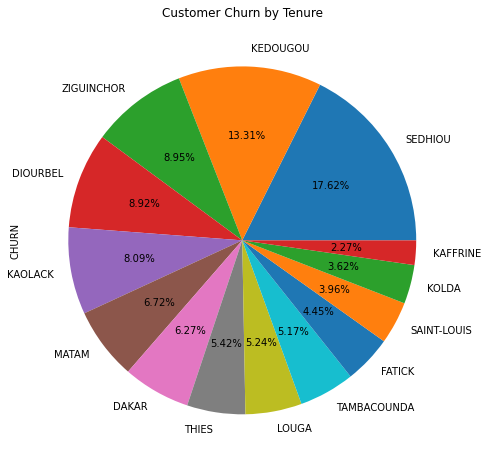

In [24]:
# plot a pieplot for the Churn distribution Region
(churn_rate_by_region).plot(kind='pie', autopct='%1.2f%%', title='Customer Churn by Tenure',figsize=(8,8))

3. Do customers who have been with the network for a longer tenure exhibit lower churn rates?

<AxesSubplot:title={'center':'Customer Churn by Tenure'}, xlabel='TENURE', ylabel='CHURN'>

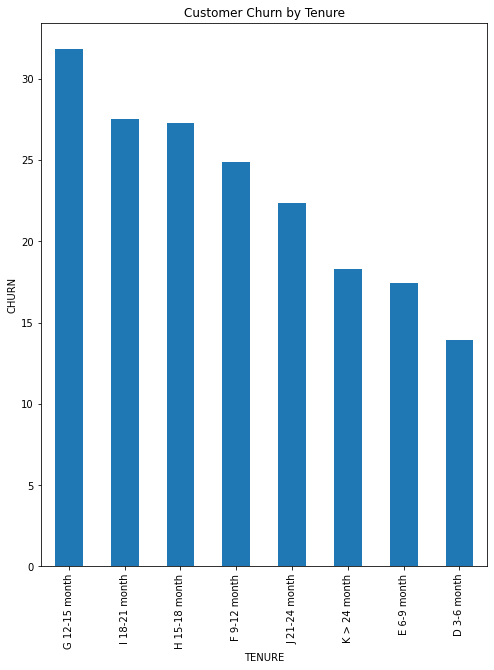

In [25]:
# TENURE and CHURN columns indicating the top pack package and churn status (0 or 1) respectively
# Calculate the churn rate by tenure
tenure_churn = df.groupby('TENURE')['CHURN'].mean() * 100

# Sort the churn rates in descending order
tenure_churned = tenure_churn.sort_values(ascending=False)

# plot to show the .
tenure_churned.plot(kind='bar', xlabel='TENURE',ylabel='CHURN',figsize=(8,10), title='Customer Churn by Tenure')

4. Is there a correlation between top-up amount (MONTANT) and churn rate?

In [26]:
# Assuming you have your data in a DataFrame named 'data'
# with 'MONTANT' and 'CHURN' columns indicating top-up amount and churn status (0 or 1) respectively

# Calculate the correlation coefficient between MONTANT and CHURN
correlation = df['MONTANT'].corr(df['CHURN'])

# Print the correlation coefficient
print("Correlation between MONTANT and CHURN:", correlation)


Correlation between MONTANT and CHURN: -0.10510982376233605


5. Are customers who frequently activate specific top pack packages (TOP_PACK) less likely to churn?

<AxesSubplot:title={'center':'Churn Distribution by Top Pack'}, ylabel='TOP_PACK'>

C:\Users\Nathaniel Havim\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


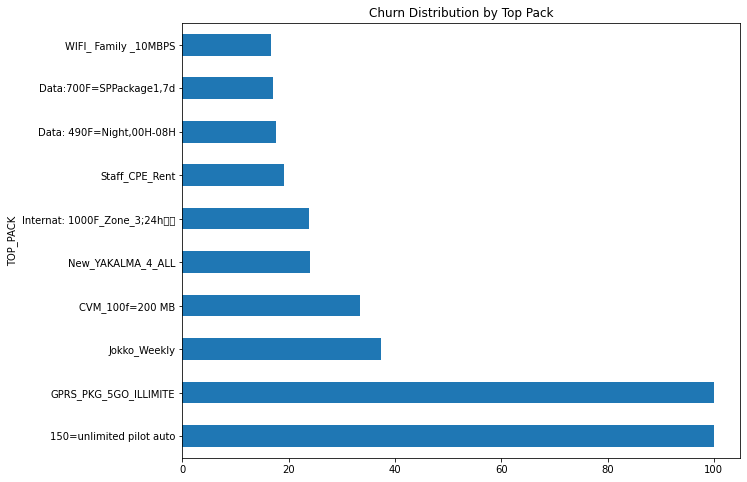

In [35]:
# Assuming you have your data in a DataFrame named 'data'
# with 'TOP_PACK' and 'CHURN' columns indicating the top pack package and churn status (0 or 1) respectively

# Calculate the churn rate by top pack packages
churn_rate_by_top_pack = df.groupby('TOP_PACK')['CHURN'].mean() * 100

# Sort the churn rates in ascending order
churn_rate_by_top_pack = churn_rate_by_top_pack.sort_values(ascending=False).head(10)

# plot the top pack packages with their respective churn rates

churn_rate_by_top_pack.plot(kind='barh',figsize=(10,8),x='Churn',title='Churn Distribution by Top Pack')

6. Are customers who have a higher number of on-net calls (ON_NET) less likely to churn?

Churn rate by top pack packages:
ON_NET
6669.0     100.0
5010.0     100.0
6227.0     100.0
8136.0     100.0
8162.0     100.0
           ...  
3430.0       0.0
3429.0       0.0
3428.0       0.0
3427.0       0.0
50809.0      0.0
Name: CHURN, Length: 8202, dtype: float64


<AxesSubplot:ylabel='Density'>

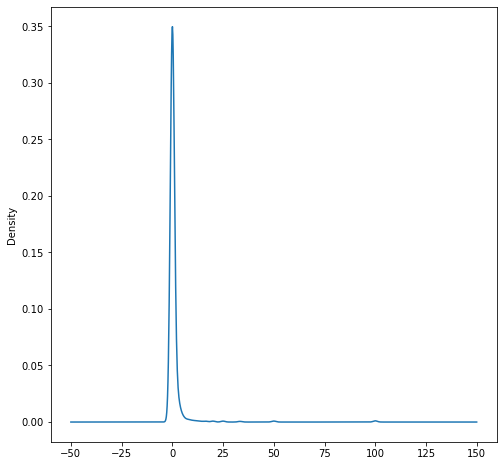

In [36]:
# Assuming you have your data in a DataFrame named 'data'
# with 'ON_NET' and 'CHURN' columns indicating the 'on_net' package and churn status (0 or 1) respectively

# Calculate the churn rate by top pack packages
churn_rate_by_on_net = df.groupby('ON_NET')['CHURN'].mean() * 100

# Sort the churn rates in ascending order
churn_rate_by_on_net = churn_rate_by_on_net.sort_values(ascending=False)

# Print the top pack packages with their respective churn rates
print("Churn rate by top pack packages:")
print(churn_rate_by_on_net)

# plot the data on density plot
churn_rate_by_on_net.plot(kind='density',x='ON_NET',y='CHURN',figsize=(8,8),xlabel="ON_NET",ylabel='CHURN')

7. Do customers who regularly refill their accounts (FREQUENCE_RECH) have lower churn rates compared to those who refill less frequently?

In [37]:
# Assuming you have your data in a DataFrame named 'data'
# with 'FREQUENCE_RECH' and 'CHURN' columns indicating the top pack package and churn status (0 or 1) respectively

# Calculate the churn rate by top pack packages
churn_rate_by_frequence_recharge = df.groupby('FREQUENCE_RECH')['CHURN'].mean() * 100

# Sort the churn rates in ascending order
churn_rate_by_frequence_recharge = churn_rate_by_top_pack.sort_values(ascending=False)

# Print the top pack packages with their respective churn rates
print("Churn rate by top frequent recharge:")
print(churn_rate_by_top_pack)

Churn rate by top frequent recharge:
TOP_PACK
150=unlimited pilot auto          100.000000
GPRS_PKG_5GO_ILLIMITE             100.000000
Jokko_Weekly                       37.288136
CVM_100f=200 MB                    33.333333
New_YAKALMA_4_ALL                  24.056604
Internat: 1000F_Zone_3;24h\t\t     23.809524
Staff_CPE_Rent                     19.148936
Data: 490F=Night,00H-08H           17.616580
Data:700F=SPPackage1,7d            16.949153
WIFI_ Family _10MBPS               16.666667
Name: CHURN, dtype: float64


## Feature Processing & Engineering

In [38]:
# class distribution of target variable
class_distribution = df['CHURN'].value_counts()
print('Class_distribution:', class_distribution)

Class_distribution: 0    875031
1    201993
Name: CHURN, dtype: int64


### Checking for Balancing in data

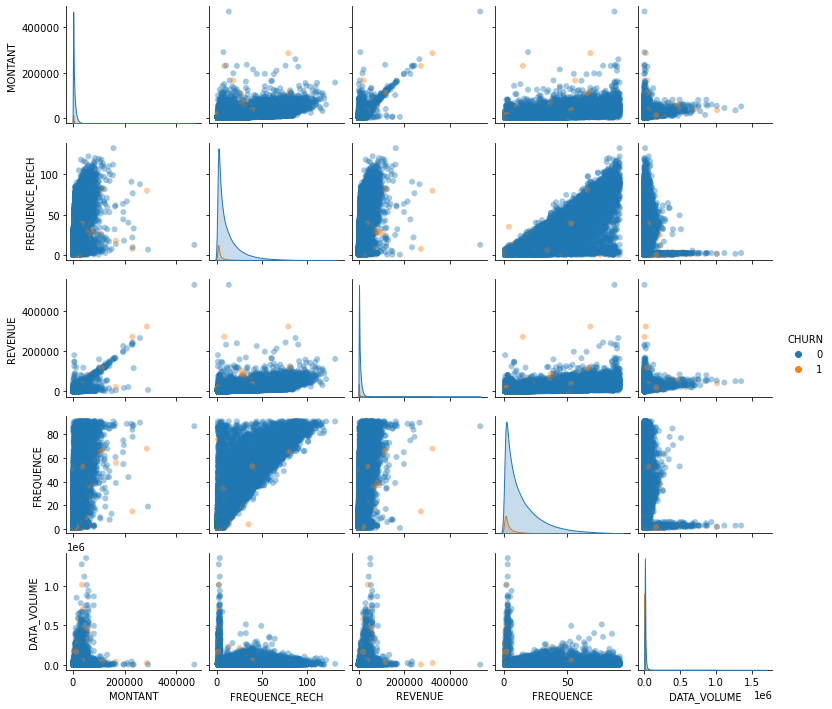

In [39]:
# split 'MONTANT','FREQUENCE_RECH','REVENUE','FREQUENCE','DATA_VOLUME','CHURN churn and not_churn categories
sns.pairplot(df[['MONTANT','FREQUENCE_RECH','REVENUE','FREQUENCE','DATA_VOLUME','CHURN']],hue='CHURN',
             plot_kws=dict(alpha=0.4, edgecolor='none'),height=2,aspect=1.1)

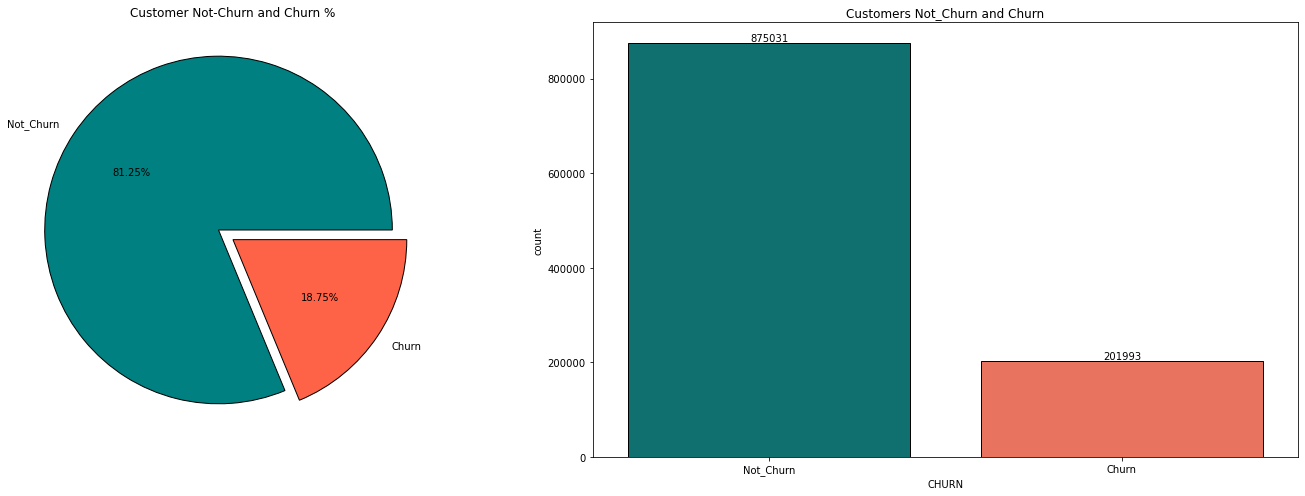

In [40]:
# Define colors for the plots
palette = ['#008080', '#FF6347', '#E50000', '#D2691E']

# Calculate the percentage of positive and negative values
churn_distribute = df['CHURN'].value_counts()
plot_pie = [churn_distribute[0] / churn_distribute.sum() * 100, churn_distribute[1] / churn_distribute.sum() * 100]

# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

# Plot the pie chart on the first subplot
axes[0].pie(plot_pie, labels=['Not_Churn', 'Churn'], autopct='%1.2f%%', explode=(0.1, 0),
            colors=palette[:2], wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Customer Not-Churn and Churn %')

# Plot the countplot on the second subplot
sns.countplot(data=df, x='CHURN', palette=palette[:2], edgecolor='black', ax=axes[1])
axes[1].set_xticklabels(['Not_Churn', 'Churn'])
axes[1].set_title('Customers Not_Churn and Churn')

# Add labels to the countplot bars
for container in axes[1].containers:
    axes[1].bar_label(container)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


### Chech and drop duplicated raw in the dataset.

In [41]:
def duplicated_rows(data):
    duplicate_rows = data.duplicated()
    num_duplicates = duplicate_rows.sum()
    print("Number of duplicate rows:", num_duplicates)

In [42]:
duplicated_rows(df)
duplicated_rows(test)

Number of duplicate rows: 313444
Number of duplicate rows: 0


In [43]:
# Drop duplicate rows
df.drop_duplicates()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077016,DAKAR,K > 24 month,14800.0,34.0,16189.0,5396.0,38.0,17112.0,32.0,142.0,13.0,7.0,NaN,NO,62,"Data:490F=1GB,7d",15.0,0
1077017,DAKAR,K > 24 month,2800.0,9.0,2950.0,983.0,9.0,NaN,19.0,42.0,0.0,NaN,NaN,NO,46,All-net 500F=1250F_AllNet_1250_Onnet;48h,3.0,0
1077020,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077022,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0


### Check and impute missing values

In [44]:
def check_missing_values(data):
    missing_values = data.isna().sum()
    print("Number of values:", missing_values)

In [45]:
check_missing_values(df)
print()
print('Missing values in the test data:')
check_missing_values(test)

Number of values: REGION             424337
TENURE                  0
MONTANT            377885
FREQUENCE_RECH     377885
REVENUE            362355
ARPU_SEGMENT       362355
FREQUENCE          362355
DATA_VOLUME        529763
ON_NET             393174
ORANGE             447144
TIGO               644774
ZONE1              992126
ZONE2             1008230
MRG                     0
REGULARITY              0
TOP_PACK           450895
FREQ_TOP_PACK      450895
CHURN                   0
dtype: int64

Missing values in the test data:
Number of values: user_id                0
REGION             74733
TENURE                 0
MONTANT            66368
FREQUENCE_RECH     66368
REVENUE            63641
ARPU_SEGMENT       63641
FREQUENCE          63641
DATA_VOLUME        93347
ON_NET             69292
ORANGE             78646
TIGO              113508
ZONE1             175213
ZONE2             178052
MRG                    0
REGULARITY             0
TOP_PACK           79290
FREQ_TOP_PACK      79290

### Features Encoding